# Project 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from random import random, seed

In [4]:
from RegLib.RegressionMethod import RegressionMethod, RegressionType
from RegLib.SamplingMethod import SamplingMethod
from RegLib.HelperFunctions import *
#from RegLib.BootstrapSampling import BootstrapSampling
#from CrossValidationKFold import CrossValidationKFold

In [6]:
seed = 2018
np.random.seed(seed)
# Make data.
x0 = np.arange(0, 1, 0.05)
y0 = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x0,y0)

z = FrankeFunction(x, y)

In [5]:
# x0, y0, z0 = create_frankie_data(seed, N = N, noise_strength=0.0)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x0, y0, z0, c='skyblue', s=5)
# ax.scatter(x, y, z, c='red', s=5)
# #ax.view_init(30, 185)
# plt.show()

### Part a): Ordinary Least Square (OLS) on the Franke function
- [ ] Fix your x and y values, they should span the whole room. Using linspace and mesh
- [ ] Add confidence intervals for beta by computing variance for each beta

In [75]:
x_mesh, y_mesh, z = create_terrain_data(N = 1000, path = 'DataFiles/SRTM_data_Norway_2.tif')
p = 2
X = create_X(x_mesh, y_mesh, p)

# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

ValueError: too many values to unpack (expected 3)

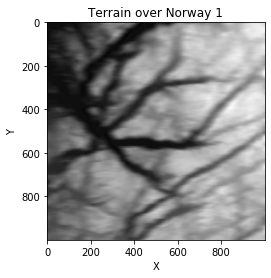

In [44]:


#plot_3d_graph(x_mesh, y_mesh, z, "Norway Terrain Data", "Elevation of terrain", dpi=150, formatter='%.f',z_line_ticks=6, view_azim=-50, set_limit=False, save_fig=True)
#plot_3d_graph(x_mesh, y_mesh, smoothed_z, "Norway Terrain Data Smoothed (Savgol filter)", "Elevation of terrain", dpi=100, formatter='%.f',z_line_ticks=6, view_azim=-50, set_limit=False, save_fig=True)
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(smoothed_z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [77]:


#predictors_input = np.c_[x_mesh.ravel(), y_mesh.ravel()]
x, y, z = create_terrain_data()
print(x.shape, y.shape, z.shape)

(1000, 1000) (1000, 1000) (1000000,)


In [121]:
int(5/2)

2

0 3 2.0
1 3 2.0
2 3 2.0


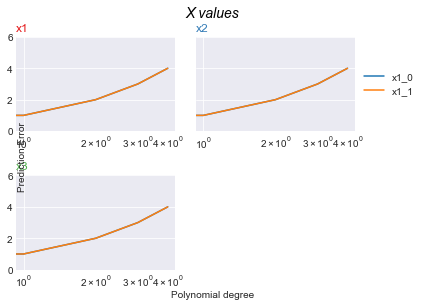

In [125]:
def mupltiple_line_plot(polydegree, values_to_plot, plot_labels, subtitle, xlabel = "Polynomial degree", ylabel = "Prediction Error", ylim = [0, 100]):
    # Initialize the figure
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    num_of_plots = len(values_to_plot)
    assert len(plot_labels) == num_of_plots, "plot_labels != values_to_plot"

    for plot_num in range(0, num_of_plots):
        # Find the right spot on the plot
        plt.subplot(np.ceil(num_of_plots/2), 2, plot_num+1)
        
        for val in values_to_plot[plot_num]:
            # Plot the lineplot
            plt.plot(polydegree, values_to_plot[plot_num][val], label=val)

        if(plot_num == 1):
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        plt.ylim(ylim[0], ylim[1])
        ax = plt.gca()
        # Not ticks everywhere
        if plot_num in range(num_of_plots) :
            ax.axes.xaxis.set_ticklabels([])
        if plot_num not in range(0, num_of_plots, 2):
            ax.axes.yaxis.set_ticklabels([])
    
        # Add title
        plt.title(plot_labels[plot_num], loc='left', fontsize=12, fontweight=0, color=palette(plot_num) )
        plt.xscale("log")


    # general title
    plt.suptitle(subtitle, fontsize=14, fontweight=0, color='black', style='italic', y=1.02)
    plt.figtext(0.5, 0.02, xlabel, ha='center', va='center')
    plt.figtext(0.06, 0.5, ylabel, ha='center', va='center', rotation='vertical')
    plt.tight_layout()

    


polydegree = [x for x in range(5)]
x1 = {"x1_0": [x for x in range(5)], "x1_1": [x for x in range(5)]}
x2 = {"x1_0": [x for x in range(5)], "x1_1": [x for x in range(5)]}
x3 = {"x1_0": [x for x in range(5)], "x1_1": [x for x in range(5)]}
x4 = {"x1_0": [x for x in range(5)], "x1_1": [x for x in range(5)]}
x5 = {"x1_0": [x for x in range(5)], "x1_1": [x for x in range(5)]}
x6 = {"x1_0": [x for x in range(5)], "x1_1": [x for x in range(5)]}

values_to_plot = [x1, x2, x3]
plot_labels = ["x1", "x2", "x3"]

mupltiple_line_plot(polydegree, values_to_plot, plot_labels, subtitle = "X values", ylim = [0, 6])